In [11]:
import pandas as pd
import seaborn as sns

<Axes: xlabel='Droplet Volume', ylabel='Contact Angle (Circle Fit)'>

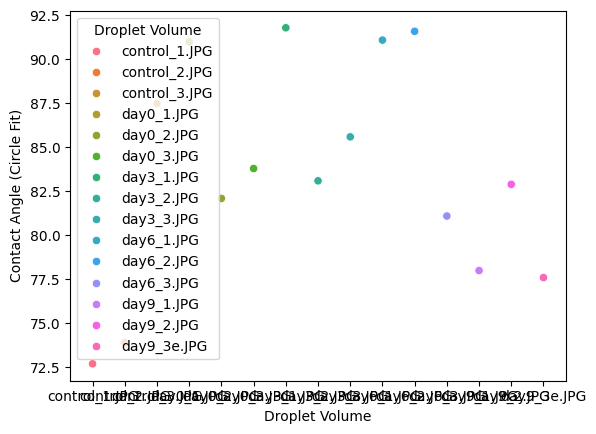

In [12]:
contact_calibration_df = pd.read_csv('contact_angles.csv', comment="#")

contact_calibration_df['Contact Angle (Circle Fit)'] = 180 - contact_calibration_df['Theta_C'] 
contact_calibration_df['Contact Angle (Ellipse Fit)'] = 180 - contact_calibration_df['Theta_E'] 
contact_calibration_df['Droplet Volume'] = contact_calibration_df['File_Name'] 
sns.scatterplot(contact_calibration_df, y= 'Contact Angle (Circle Fit)', x='Droplet Volume', hue='Droplet Volume')

In [13]:
contact_df = pd.read_csv('contact_angles.csv', comment="#")

In [14]:
# Taking 180 - theta since this is what is shown
# https://www.researchgate.net/publication/328733959_Measuring_the_Contact_Angle_using_ImageJ_with_Contact_Angle_Plug-in
contact_df['Day IPTG Was Added'] = contact_df['File_Name'].apply(lambda x: x.split('_')[0])
days_to_hours = {
    'day0': '240',
    'day3': '168',
    'day6': '96',
    'day9': '24',
    'control': '0',
}
contact_df['Time after IPTG induction (hrs)'] = contact_df['Day IPTG Was Added'].apply(lambda x : days_to_hours[x])
contact_df['replicate'] = contact_df['File_Name'].apply(lambda x: x.split('_')[1])
contact_df['Contact Angle (Circle Fit)'] = 180 - contact_df['Theta_C'] 
contact_df['Contact Angle (Ellipse Fit)'] = 180 - contact_df['Theta_E'] 

In [15]:
contact_df

,File_Name,Angle,Length,Theta_C,Uncertainty,Theta_Left,Theta_Right,Theta_E,Radius,Cricle_StDev,Ellipse_StDev,e,Points,Volume,Day IPTG Was Added,Time after IPTG induction (hrs),replicate,Contact Angle (Circle Fit),Contact Angle (Ellipse Fit)
1,control_1.JPG,-179.666889,688.011628,107.3,0.2,110.0,109.5,109.8,360.28,0.880684,0.000850,0.96,103,1.402940e+08,control,0,1.JPG,72.7,70.2
1,control_2.JPG,-178.835612,738.152423,106.1,0.4,112.9,109.8,111.4,384.18,2.073595,0.002151,0.91,103,1.668737e+08,control,0,2.JPG,73.9,68.6
1,control_3.JPG,180.000000,735.000000,92.5,0.4,101.3,93.9,97.6,367.88,1.945958,0.001691,0.89,103,1.110700e+08,control,0,3.JPG,87.5,82.4
1,day0_1.JPG,180.000000,925.000000,89.0,0.2,92.3,90.1,91.2,462.08,1.221002,0.001132,0.95,103,2.012778e+08,day0,240,1.JPG,91.0,88.8
1,day0_2.JPG,-179.528163,850.028823,97.9,0.5,107.7,106.3,107.0,428.71,2.564097,0.000514,0.86,103,1.988792e+08,day0,240,2.JPG,82.1,73.0
1,day0_3.JPG,-179.209763,870.082755,96.2,0.3,101.1,102.9,102.0,437.64,1.676883,0.001433,0.90,103,2.037330e+08,day0,240,3.JPG,83.8,78.0
1,day3_1.JPG,-179.248623,915.078685,88.2,0.2,93.5,90.2,91.8,457.81,1.215398,0.004280,0.92,103,1.917445e+08,day3,168,1.JPG,91.8,88.2
1,day3_2.JPG,179.415369,882.045917,96.9,0.4,105.4,104.3,104.8,444.35,2.115049,0.001753,0.87,103,2.167815e+08,day3,168,2.JPG,83.1,75.2
1,day3_3.JPG,-179.599337,858.020979,94.4,0.1,92.8,91.6,92.2,430.23,0.670470,0.001327,0.96,103,1.859441e+08,day3,168,3.JPG,85.6,87.8
1,day6_1.JPG,178.512132,924.311636,88.9,0.3,95.5,93.4,94.4,462.33,1.543798,0.003769,0.90,103,2.009306e+08,day6,96,1.JPG,91.1,85.6


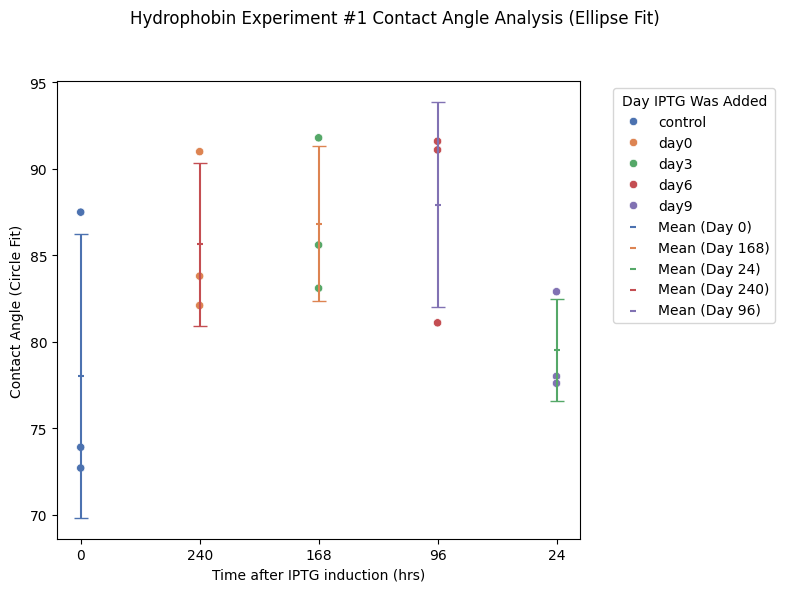

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Calculate means and standard deviations
stats = (
    contact_df.groupby("Time after IPTG induction (hrs)")["Contact Angle (Circle Fit)"]
    .agg(["mean", "std"])
    .reset_index()
)

# Set up the color palette
palette = sns.color_palette("deep", n_colors=contact_df["Time after IPTG induction (hrs)"].nunique())
color_mapping = dict(zip(stats["Time after IPTG induction (hrs)"], palette))

# Create scatterplot
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(
    data=contact_df,
    y="Contact Angle (Circle Fit)",
    x="Time after IPTG induction (hrs)",
    hue="Day IPTG Was Added",
    palette=palette,
)

# Add "T" standard deviation marks and mean markers
for _, row in stats.iterrows():
    plt.errorbar(
        x=row["Time after IPTG induction (hrs)"],
        y=row["mean"],
        yerr=row["std"],
        fmt="none",
        ecolor=color_mapping[row["Time after IPTG induction (hrs)"]],  # Color by hue
        capsize=5,
    )
    plt.scatter(
        row["Time after IPTG induction (hrs)"],
        row["mean"],
        color=color_mapping[row["Time after IPTG induction (hrs)"]],
        # edgecolor='black',
        marker="_",
        s=20,
        label=f"Mean (Day {row['Time after IPTG induction (hrs)']})",  # Use string directly
    )

# Adjust legend position
plt.legend(title="Day IPTG Was Added", bbox_to_anchor=(1.05, 1), loc="upper left")

# Add a big title
plt.suptitle(
    "Contact Angle Analysis Over Days IPTG Was Added",
    fontsize=16,
    weight="bold",
    y=1.02,
)

# Improve layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave more space at the top

plt.suptitle("Hydrophobin Experiment #1 Contact Angle Analysis (Circle Fit)")
plt.show()